### Modeling

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.svm import SVR


from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,plot_roc_curve,accuracy_score,roc_curve,roc_auc_score,recall_score

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import AdaBoostRegressor
from sklearn.feature_selection import SelectFwe, f_regression

In [73]:
X = df.drop('target',axis=1)
y = df['target']

In [74]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [75]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [76]:
# Split the dataset into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [78]:
# Put models in a dictionary
models = {
          "Logistic Regression": LogisticRegression(solver='liblinear'), 
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()
          }

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [79]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8360655737704918}

## Logistic regression

let's see the coefficient for each features.

In [89]:
from sklearn.linear_model import LogisticRegressionCV 
log_model = LogisticRegressionCV()
log_model.fit(X_train,y_train)

LogisticRegressionCV()

In [90]:
print(log_model.C_)
print(log_model.get_params())

[2.7825594]
{'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}


In [91]:
log_model.coef_

array([[ 0.0132779 , -1.44042715,  0.74159866, -0.00756815, -0.00378974,
        -0.4685057 ,  0.31656136,  0.03108143, -0.82057365, -0.51008937,
         0.22018663, -0.88119038, -0.6889626 ]])

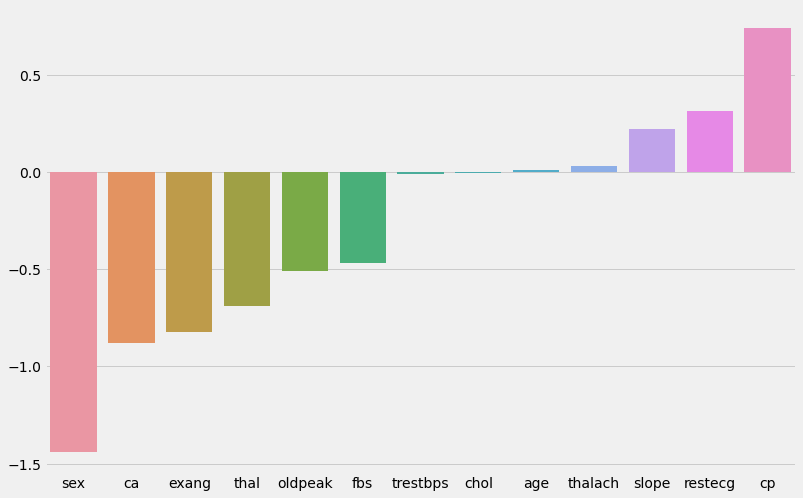

In [92]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

coefs = coefs.sort_values()
sns.barplot(x=coefs.index,y=coefs.values);

**logistic regression**

In [105]:
# Train and predict.
LL = LogisticRegression(solver='liblinear',max_iter = 1000, random_state = 31)
LL.fit(X_train,Y_train)
Y_pred_lr = LL.predict(X_test) 
y_pred_lr = np.around(Y_pred_lr)
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
score_lr

85.25

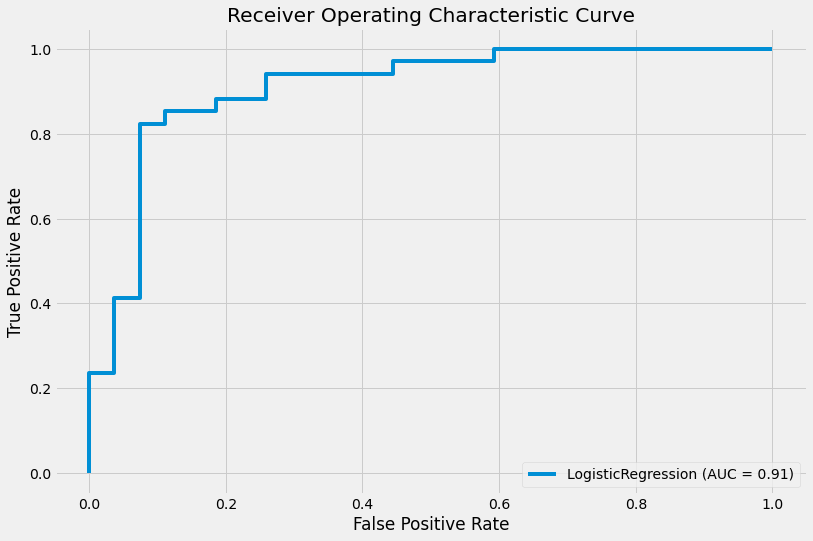

In [106]:
plot_roc_curve(LL,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("LR.png")

In [107]:
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

